# **Spam Email Detection**

### **Import necessary libraries**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, auc
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_recall_curve, average_precision_score
from collections import Counter

### **Load the dataset**

In [2]:
data = pd.read_csv("Spam Email Detection - spam.csv")

### **Data Preprocessing**

In [3]:
X = data["v2"]
y = data["v1"]

### **Convert labels to binary (0 for ham, 1 for spam)**

In [4]:
y = y.map({"ham": 0, "spam": 1})

### **Feature Extraction (TF-IDF)**

In [5]:
vectorizer = TfidfVectorizer(max_features=8000)
X = vectorizer.fit_transform(X)

### **Split the Dataset into Training and Testing Sets**

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)

### **Model Selection (Multinomial Naive Bayes)**

In [7]:
classifier = MultinomialNB()

### **Hyperparameter Tuning using GridSearchCV**

In [8]:
param_grid = {"alpha": [0.1, 1.0, 10.0]}
grid_search = GridSearchCV(classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 1.0, 10.0]})

### **Get the best hyperparameter value**

In [9]:
best_alpha = grid_search.best_params_["alpha"]

### **Train and Evaluate the Model**

In [10]:
best_classifier = MultinomialNB(alpha=best_alpha)
best_classifier.fit(X_train, y_train)
y_pred = best_classifier.predict(X_test)

### **Evaluate performance**

In [11]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9857
Precision: 0.9597
Recall: 0.9346
F1 Score: 0.9470


### **Create a Word Cloud for Spam Emails**

In [12]:
spam_emails = data[data['v1'] == 'spam']
spam_text = ' '.join(spam_emails['v2'])
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_text)

### **Display the word cloud**

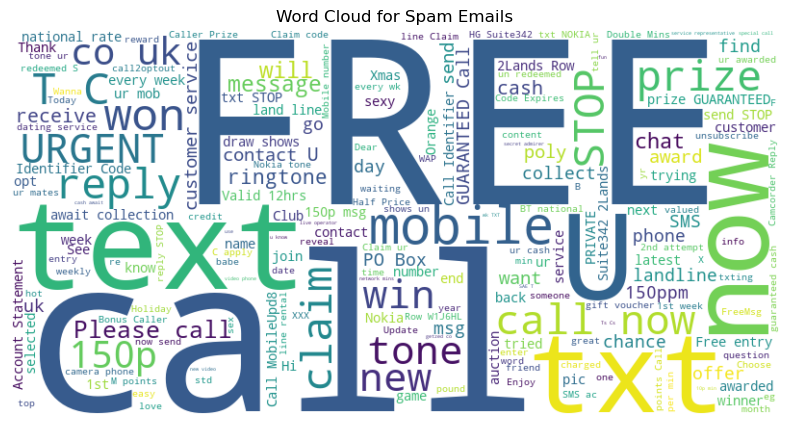

In [13]:
plt.figure(figsize=(10, 5))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Spam Emails')
plt.axis('off')
plt.show()

### **Confusion Matrix**

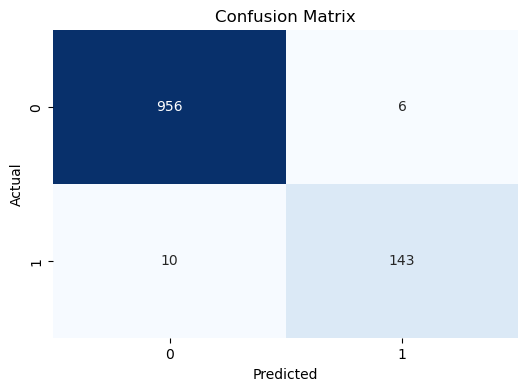

In [14]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### **Precision-Recall Curve**

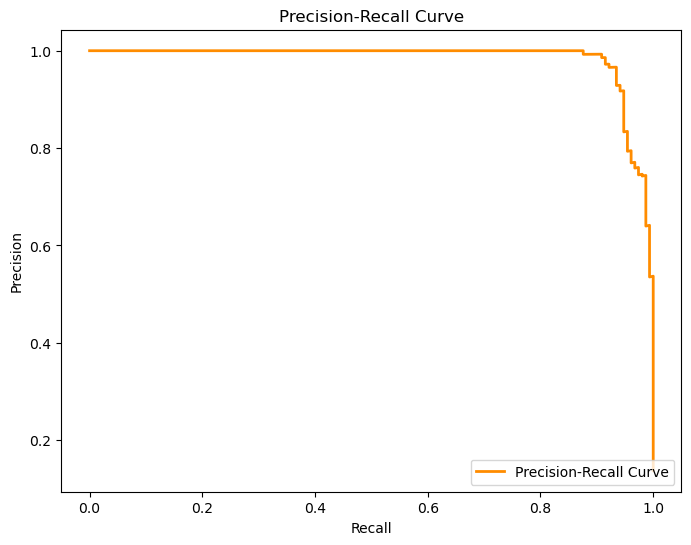

In [15]:
precision, recall, _ = precision_recall_curve(y_test, best_classifier.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower right')
plt.show()

### **Create an ROC Curve and AUC Score**

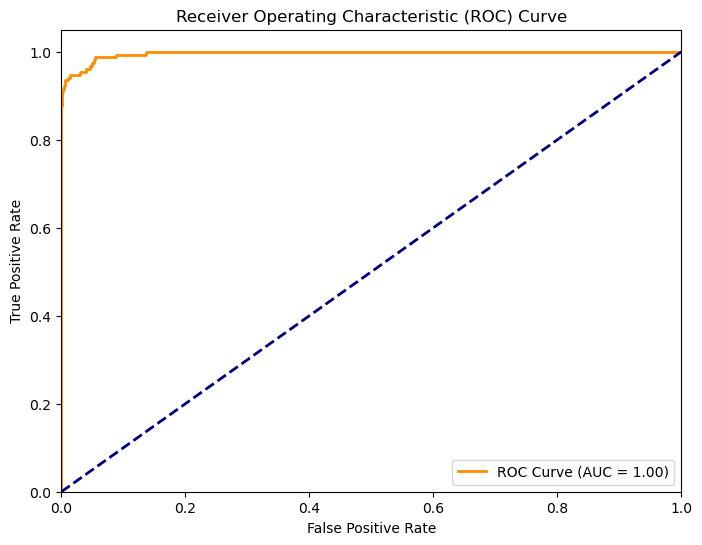

In [16]:
fpr, tpr, thresholds = roc_curve(y_test, best_classifier.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### **Word Frequency Distributions**

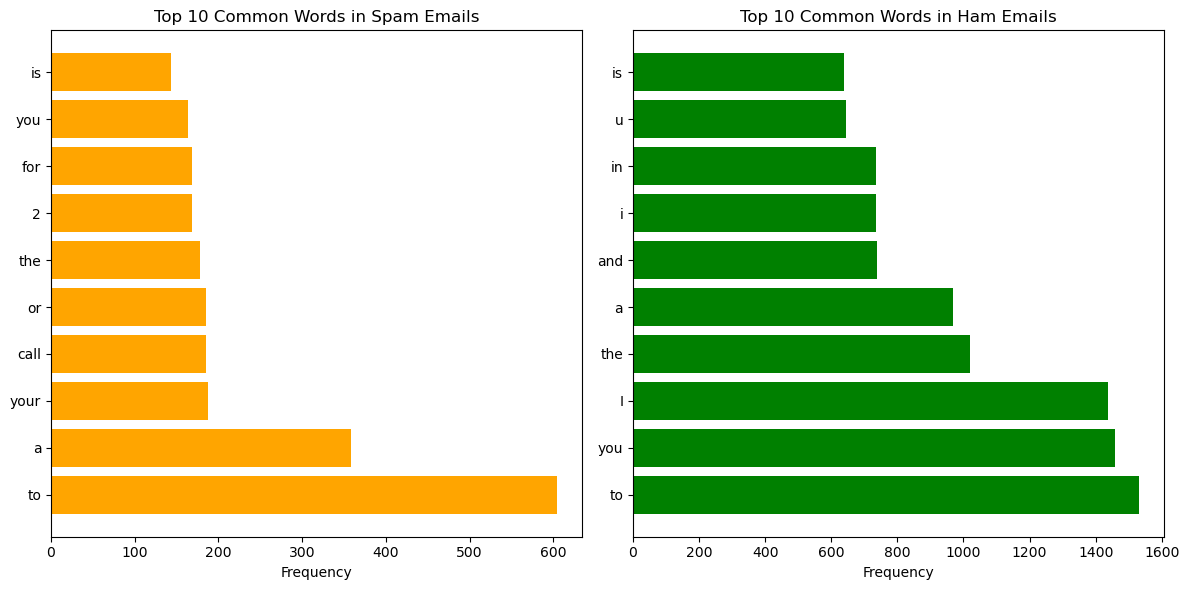

In [17]:
# For spam emails
spam_word_counts = Counter(' '.join(spam_emails['v2']).split())
# For non-spam (ham) emails
ham_word_counts = Counter(' '.join(data[data['v1'] == 'ham']['v2']).split())

# Get the most common words in spam and ham emails
common_spam_words = spam_word_counts.most_common(10)
common_ham_words = ham_word_counts.most_common(10)

# Plot word frequency distributions
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.barh([word[0] for word in common_spam_words], [word[1] for word in common_spam_words], color='orange')
plt.xlabel('Frequency')
plt.title('Top 10 Common Words in Spam Emails')
plt.subplot(122)
plt.barh([word[0] for word in common_ham_words], [word[1] for word in common_ham_words], color='green')
plt.xlabel('Frequency')
plt.title('Top 10 Common Words in Ham Emails')
plt.tight_layout()
plt.show()

### **Feature Importance (TF-IDF Scores)**

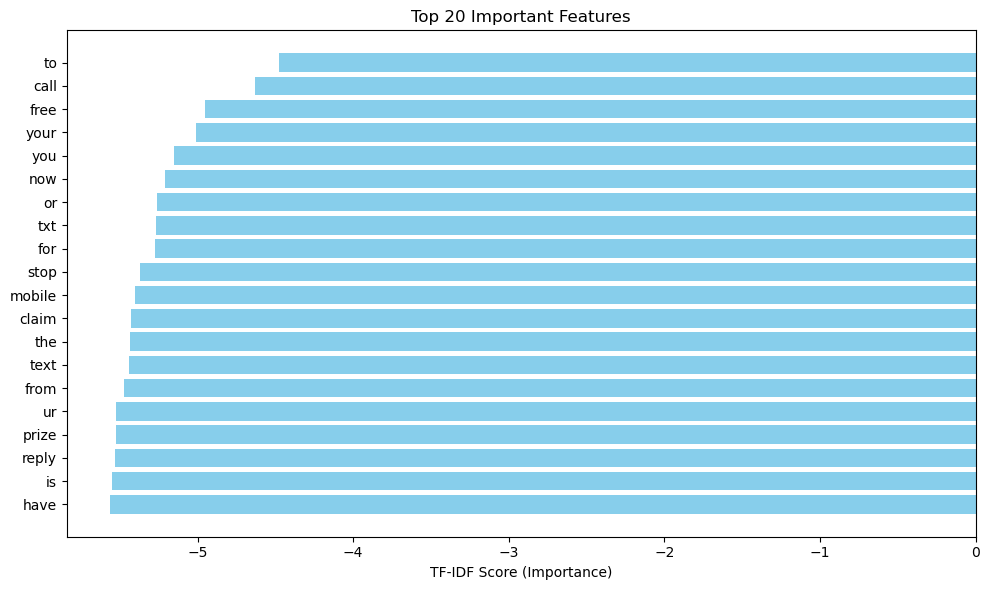

In [18]:
# Get feature names (words or terms)
feature_names = np.array(vectorizer.get_feature_names_out())

# Get TF-IDF scores for the best classifier
tfidf_scores = best_classifier.feature_log_prob_[1]

# Sort feature names by TF-IDF scores (importance)
sorted_features = feature_names[np.argsort(tfidf_scores)[::-1]]

# Plot top N important features
top_n = 20
plt.figure(figsize=(10, 6))
plt.barh(sorted_features[:top_n], tfidf_scores[np.argsort(tfidf_scores)[::-1]][:top_n], color='skyblue')
plt.xlabel('TF-IDF Score (Importance)')
plt.title('Top 20 Important Features')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()